In [171]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn import utils
import matplotlib.pyplot as plt

#Importing Dataset
dataset=pd.read_csv('https://raw.githubusercontent.com/MeherNety/UOIT_ML_Final-_Project/main/lung_cancer_dataset.csv')
dataset


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [172]:
 #Exploratory Data Analysis
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [173]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [174]:
dataset.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [175]:
dataset.corr()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
AGE,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104
SMOKING,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117
YELLOW_FINGERS,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829
ANXIETY,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634
PEER_PRESSURE,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828
CHRONIC DISEASE,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938
FATIGUE,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832
ALLERGY,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433
WHEEZING,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640
ALCOHOL CONSUMING,0.058985,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226


In [176]:
dataset.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [177]:
#Checking for null values
dataset.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [178]:
#Defining value O as NaN

dataset[["GENDER","AGE","SMOKING",
     "YELLOW_FINGERS","ANXIETY","PEER_PRESSURE"]] = dataset[["GENDER","AGE","SMOKING",
     "YELLOW_FINGERS","ANXIETY","PEER_PRESSURE"]].replace(0,np.NaN)

In [179]:
#Rechecking the null values again
print(dataset.isnull().sum()) 

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


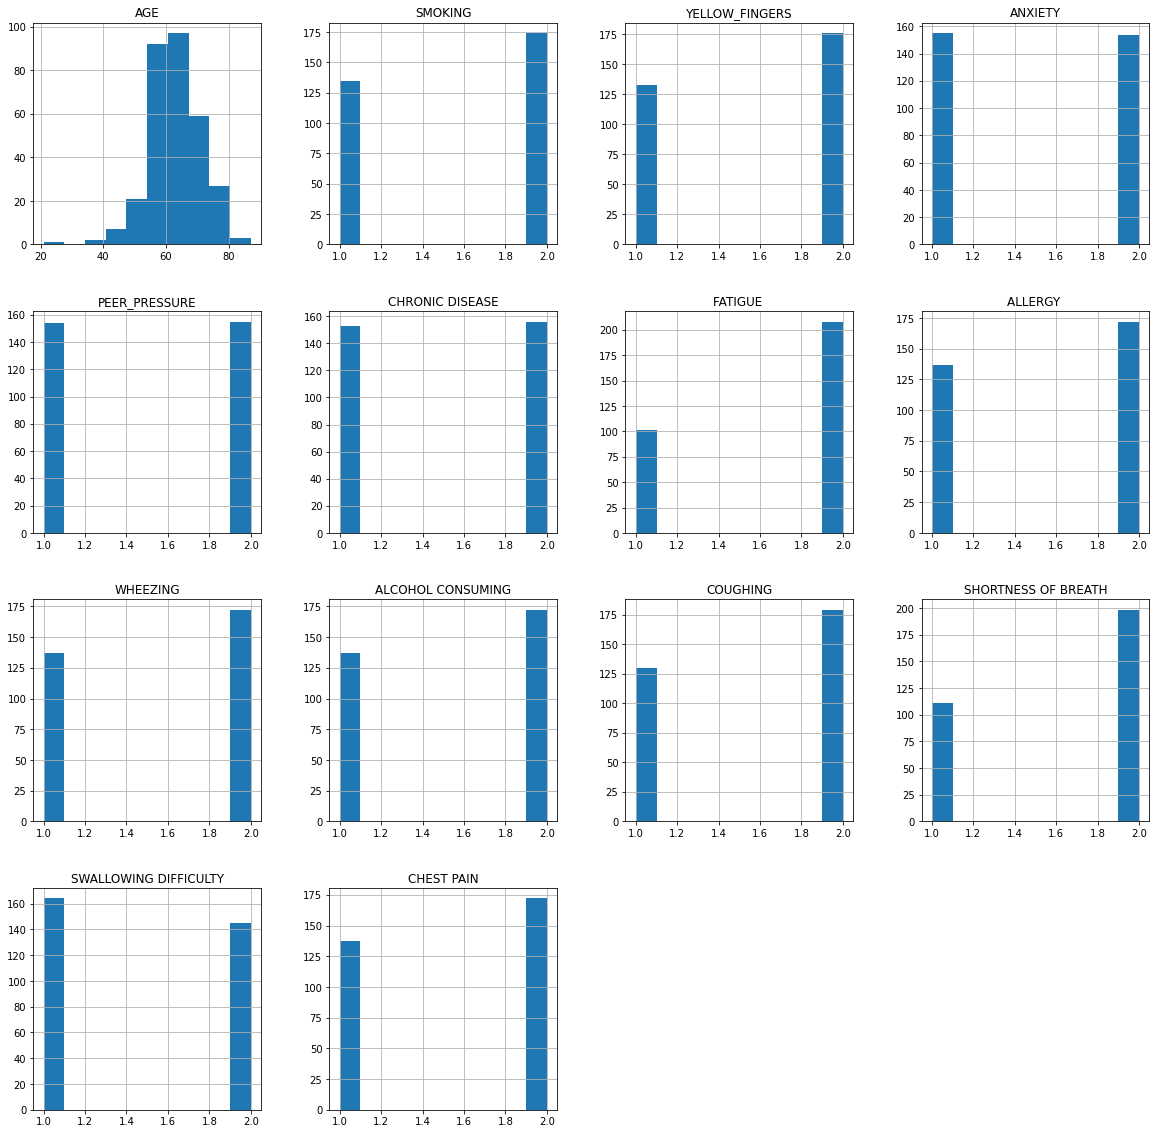

In [180]:
# Final visualisations 
# Basic Histogram
dataset.iloc[:,0:16].hist(figsize=(20,20))
plt.show() 

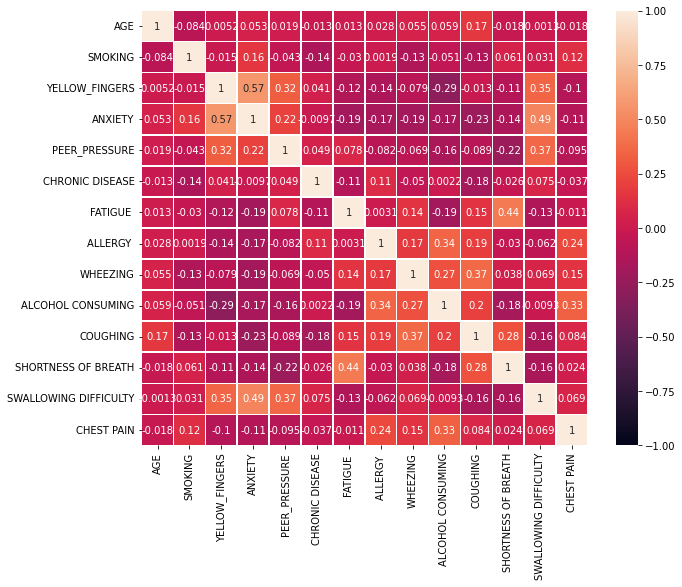

In [181]:
import seaborn as sns
# Corelation
corrPearson = dataset.corr(method="pearson")
corrSpearman = dataset.corr(method="spearman")

#heatmap generation
plt.figure(figsize = (10,8))
sns.heatmap(dataset.corr(), annot= True, vmax=1,vmin=-1,linewidths =0.5)



In [182]:
#Converting string to int
dataset.replace({'F': 0, 'M': 1}, inplace=True)
dataset.replace({'YES': 2, 'NO': 1}, inplace=True)
x = dataset.drop("LUNG_CANCER", axis = 1)
y = dataset["LUNG_CANCER"]
dataset[1:2]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2


In [183]:
dataset.dtypes

GENDER                   int64
AGE                      int64
SMOKING                  int64
YELLOW_FINGERS           int64
ANXIETY                  int64
PEER_PRESSURE            int64
CHRONIC DISEASE          int64
FATIGUE                  int64
ALLERGY                  int64
WHEEZING                 int64
ALCOHOL CONSUMING        int64
COUGHING                 int64
SHORTNESS OF BREATH      int64
SWALLOWING DIFFICULTY    int64
CHEST PAIN               int64
LUNG_CANCER              int64
dtype: object

<Figure size 1440x576 with 0 Axes>

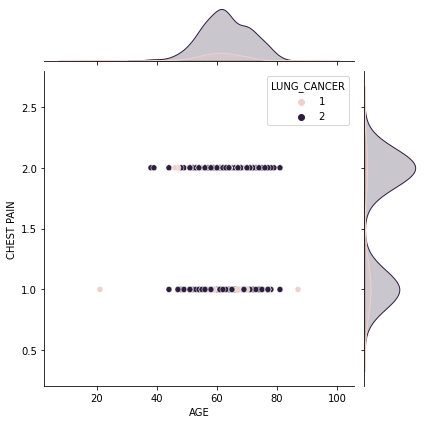

In [184]:
figure = plt.figure(figsize=(20,8))
sns.jointplot(x="AGE",y="CHEST PAIN", color="#4CB391",hue="LUNG_CANCER",data=dataset)
plt.show()

In [185]:
#Removing Warings from compiler
import warnings
warnings.filterwarnings('ignore')


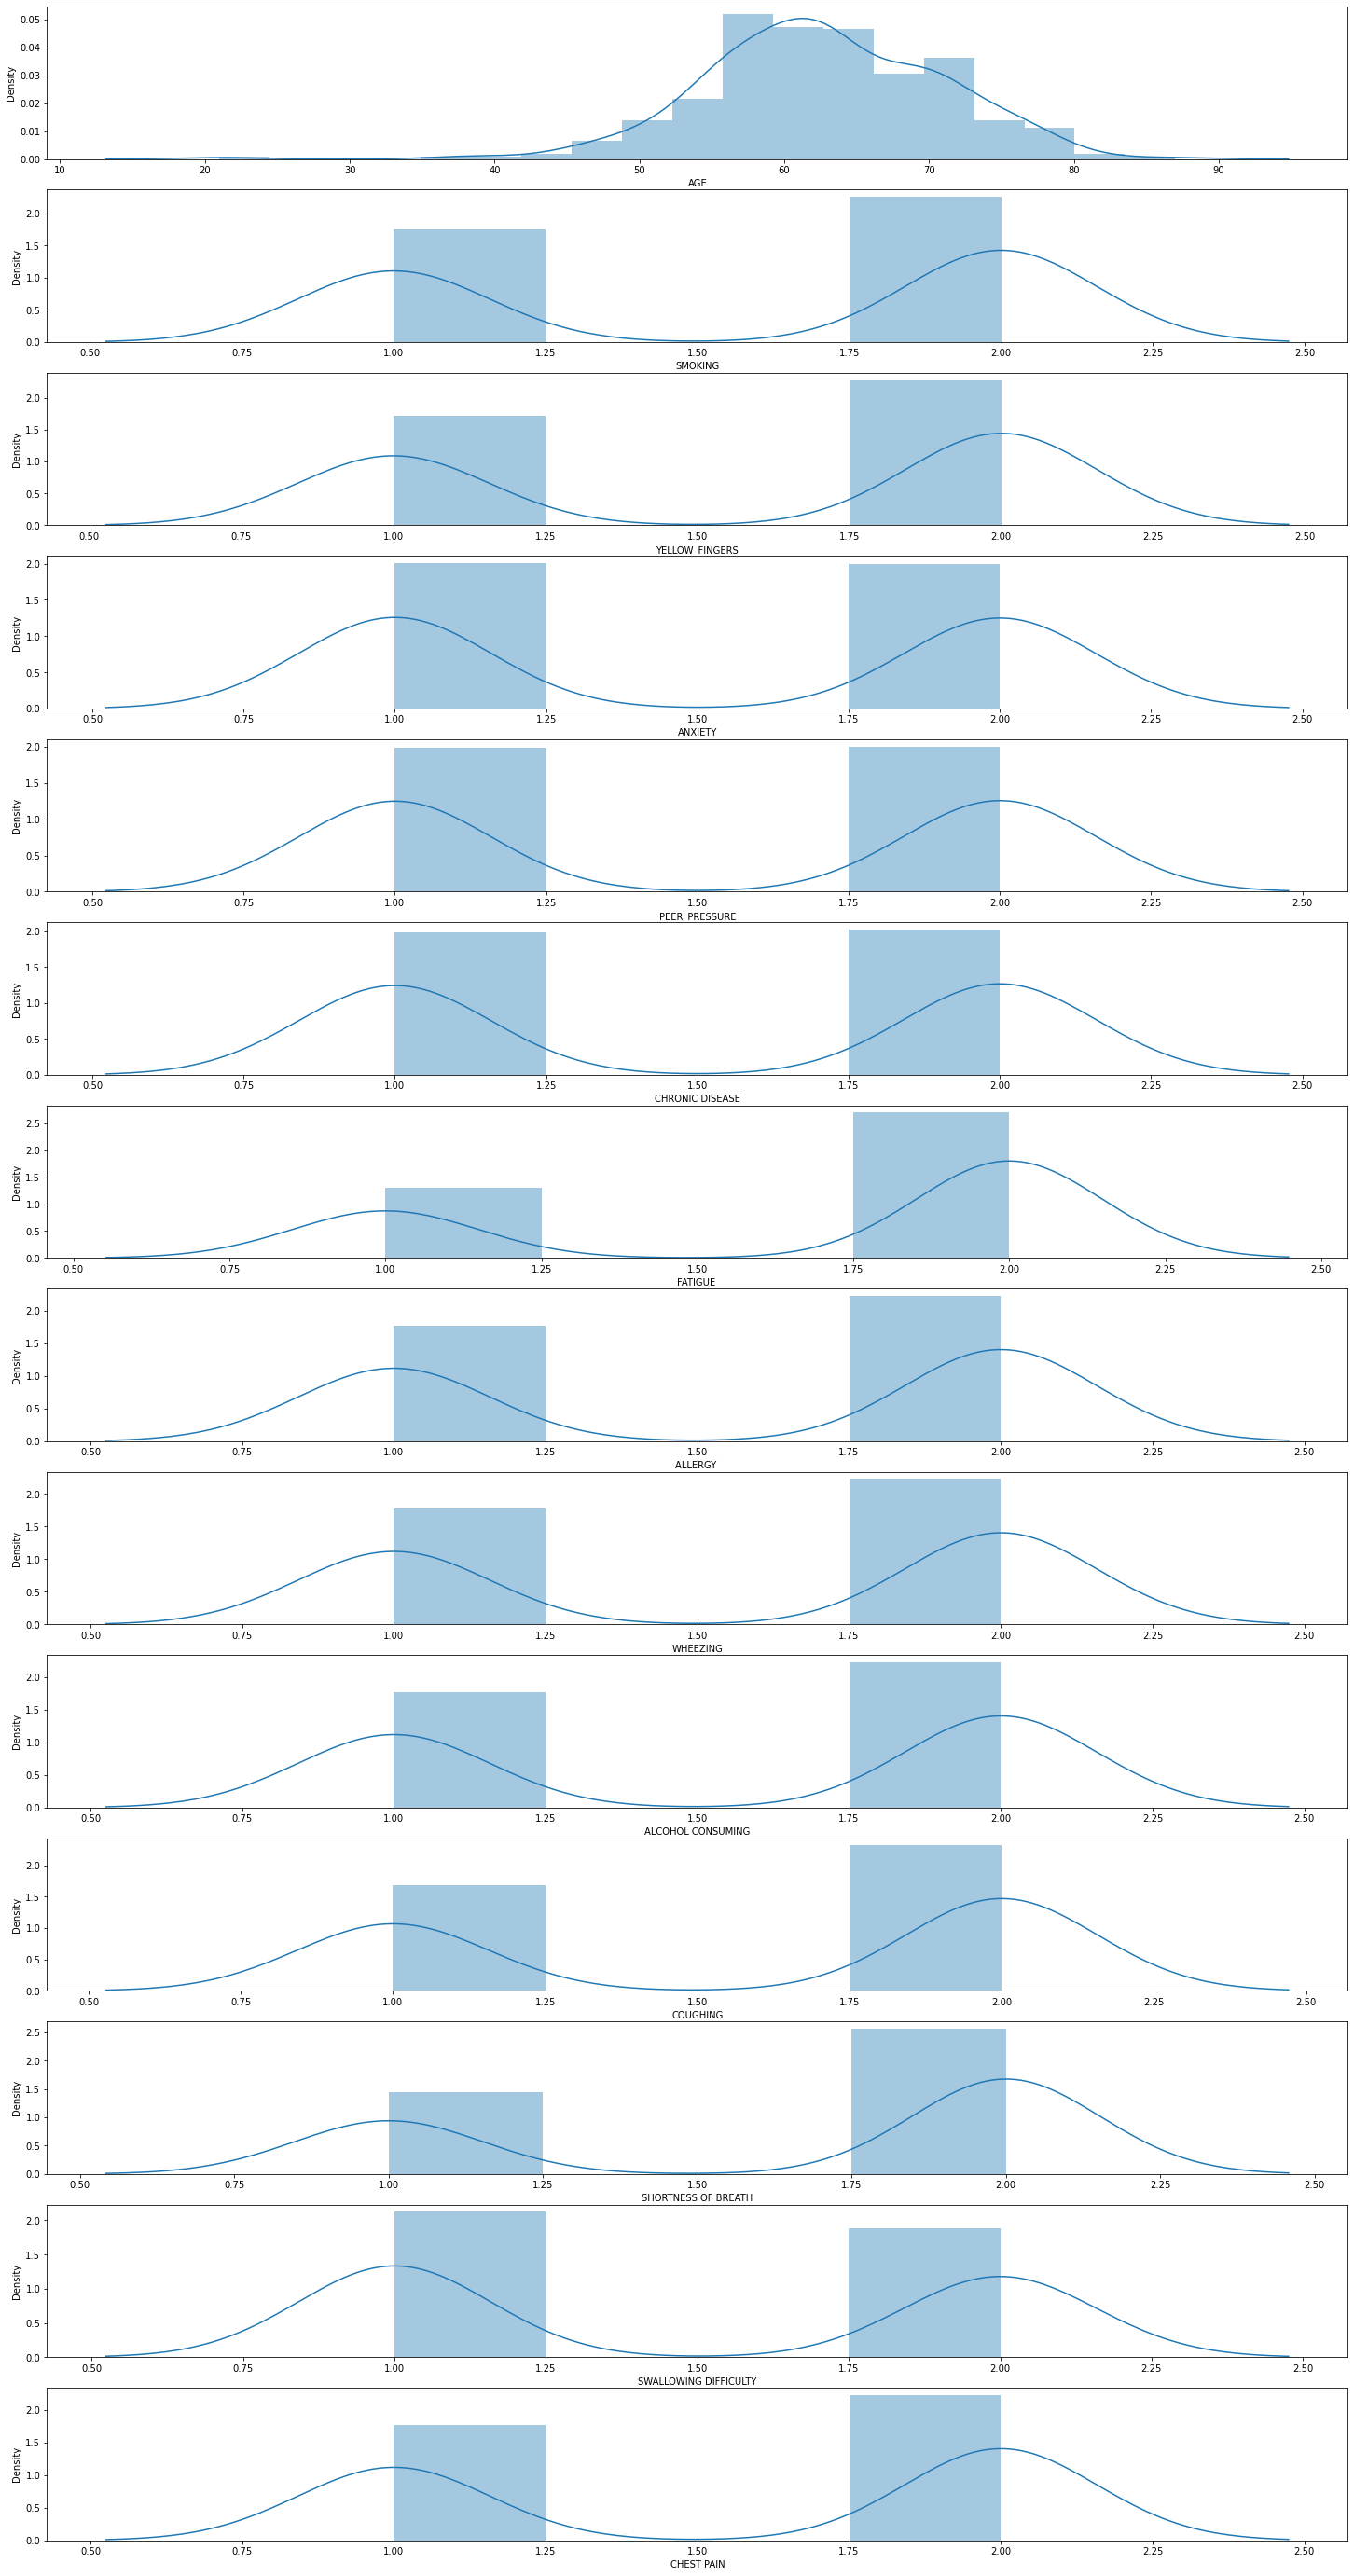

In [186]:
figure, ax1 = plt.subplots(14, figsize=(25,50))
data=dataset.drop(columns = ['LUNG_CANCER'])
columns = list(data.drop(columns= ['GENDER']).columns)
m = 0
for i in range(14):          
        sns.distplot(dataset[columns[m]], ax = ax1[i])
        m += 1

In [187]:
# Dependent and Independent Variables seperartion
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
x = dataset.drop('LUNG_CANCER',axis=1)
y = dataset['LUNG_CANCER']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=4)


In [188]:
#ML Model 1: Logistic Regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression(random_state=42)
regressor.fit(x_train,y_train)
lr_pred=regressor.predict(x_test)
LR_score = accuracy_score(y_test,lr_pred)*100
LR_MSE = mean_squared_error(y_test,lr_pred)
LR_R2_Score = r2_score(y_test,lr_pred)
print("The accuracy of Logistic Regression model is", LR_score)
print("MSE is: ", LR_MSE)
print("R2 SCORE: ", LR_R2_Score)


The accuracy of Logistic Regression model is 95.96774193548387
MSE is:  0.04032258064516129
R2 SCORE:  0.6412037037037037


In [189]:
#ML Model 2 : Support Vector Classifier(SVC) 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model = SVC(random_state=42)
model.fit(x_train,y_train)
svc_pred=model.predict(x_test)
SVC_score = accuracy_score(y_test,svc_pred)*100
SVC_MSE = mean_squared_error(y_test,svc_pred)
SVC_R2_Score = r2_score(y_test,svc_pred)
print("The accuracy of SVC model is", SVC_score)
print("MSE is: ", SVC_MSE )
print("R2 SCORE: ",SVC_R2_Score)

The accuracy of SVC model is 87.09677419354838
MSE is:  0.12903225806451613
R2 SCORE:  -0.14814814814814792


In [190]:
# ML Model 3 : Deep Neural Network
import tensorflow as tf
from tensorflow import keras

print('tf version:',tf.__version__, 'keras version:',keras.__version__)
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[15,]),
keras.layers.BatchNormalization(),
keras.layers.Dense(150, activation="elu",kernel_initializer="HeNormal"),
keras.layers.Dense(60, activation="relu",kernel_initializer="HeNormal"),
keras.layers.Dense(40, activation="softmax",kernel_initializer="HeNormal"),
keras.layers.Dense(1),
keras.layers.Dropout(rate=0.5),])

tf version: 2.9.2 keras version: 2.9.0


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 15)                0         
                                                                 
 batch_normalization_4 (Batc  (None, 15)               60        
 hNormalization)                                                 
                                                                 
 dense_16 (Dense)            (None, 150)               2400      
                                                                 
 dense_17 (Dense)            (None, 60)                9060      
                                                                 
 dense_18 (Dense)            (None, 40)                2440      
                                                                 
 dense_19 (Dense)            (None, 1)                 41        
                                                      

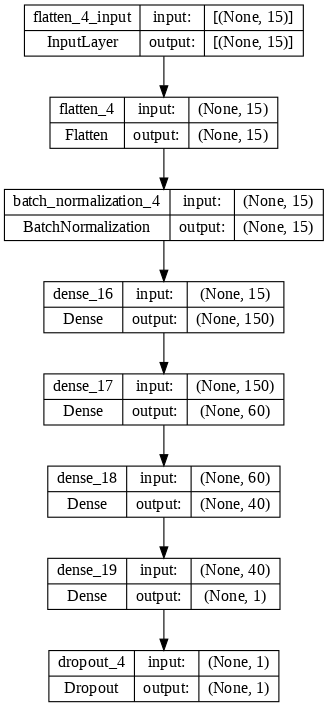

In [191]:
model.summary()
tf.keras.utils.plot_model(
    model, to_file='fd.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=True, dpi=80
)

In [162]:
model.compile(loss="hinge",
metrics=["accuracy"])
history = model.fit(x_train,y_train, epochs=100, validation_data=(x_test, y_test), verbose=2)

Epoch 1/100
6/6 - 2s - loss: 0.7565 - accuracy: 0.0000e+00 - val_loss: 0.3033 - val_accuracy: 0.0000e+00 - 2s/epoch - 382ms/step
Epoch 2/100
6/6 - 0s - loss: 0.5925 - accuracy: 0.0108 - val_loss: 0.2890 - val_accuracy: 0.0000e+00 - 107ms/epoch - 18ms/step
Epoch 3/100
6/6 - 0s - loss: 0.5812 - accuracy: 0.0324 - val_loss: 0.3209 - val_accuracy: 0.0000e+00 - 114ms/epoch - 19ms/step
Epoch 4/100
6/6 - 0s - loss: 0.5012 - accuracy: 0.0649 - val_loss: 0.3507 - val_accuracy: 0.0000e+00 - 57ms/epoch - 9ms/step
Epoch 5/100
6/6 - 0s - loss: 0.5554 - accuracy: 0.0919 - val_loss: 0.3556 - val_accuracy: 0.0000e+00 - 48ms/epoch - 8ms/step
Epoch 6/100
6/6 - 0s - loss: 0.5208 - accuracy: 0.0541 - val_loss: 0.3600 - val_accuracy: 0.0000e+00 - 62ms/epoch - 10ms/step
Epoch 7/100
6/6 - 0s - loss: 0.5174 - accuracy: 0.0757 - val_loss: 0.3720 - val_accuracy: 0.0000e+00 - 45ms/epoch - 7ms/step
Epoch 8/100
6/6 - 0s - loss: 0.5497 - accuracy: 0.0595 - val_loss: 0.3883 - val_accuracy: 0.0000e+00 - 60ms/epoch - 

In [163]:
predictions = model.predict(x_test)
print(predictions)
y_DNN = (predictions > 0.5)

4/4 [==============================] - 0s 4ms/step
[[0.52057064]
 [0.33357462]
 [0.35646114]
 [0.5011189 ]
 [0.520669  ]
 [0.40827703]
 [0.518234  ]
 [0.41026083]
 [0.5191792 ]
 [0.5101721 ]
 [0.52089286]
 [0.52080226]
 [0.3942779 ]
 [0.49412152]
 [0.5208515 ]
 [0.35265478]
 [0.4449292 ]
 [0.47924232]
 [0.5181287 ]
 [0.5207673 ]
 [0.28745663]
 [0.40705627]
 [0.42768824]
 [0.5170429 ]
 [0.4943675 ]
 [0.5206422 ]
 [0.5029253 ]
 [0.31628016]
 [0.30060008]
 [0.44673577]
 [0.4479692 ]
 [0.2762986 ]
 [0.5020765 ]
 [0.38159117]
 [0.51651955]
 [0.5204154 ]
 [0.5195925 ]
 [0.5183406 ]
 [0.3337383 ]
 [0.36492923]
 [0.33720306]
 [0.49277157]
 [0.50456405]
 [0.5205635 ]
 [0.5179331 ]
 [0.51983744]
 [0.3700679 ]
 [0.36173224]
 [0.52075404]
 [0.5203679 ]
 [0.43125746]
 [0.29527435]
 [0.51972145]
 [0.5100965 ]
 [0.33459216]
 [0.33924687]
 [0.5205688 ]
 [0.50597715]
 [0.5190407 ]
 [0.35731283]
 [0.4372353 ]
 [0.44138503]
 [0.52089095]
 [0.5194958 ]
 [0.30360416]
 [0.4449292 ]
 [0.5157765 ]
 [0.3038105

In [164]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
DNN_score = accuracy_score(y_test,y_DNN)*100
matrix = confusion_matrix(y_test, y_DNN)
print(matrix)
print('Accuracy of DNN is:',DNN_score)

[[ 0  0  0]
 [ 0 16  0]
 [67 41  0]]
Accuracy of DNN is: 12.903225806451612


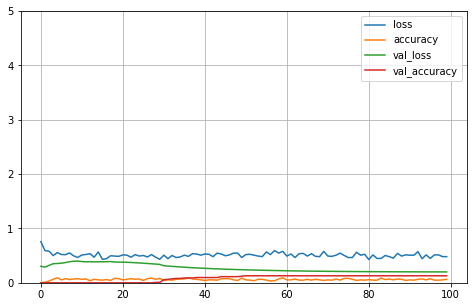

In [165]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 5)
plt.show()

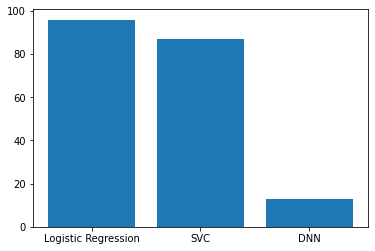

In [166]:
#Accuracy Comparision.
import matplotlib.pyplot as plt
a=LR_score
b=SVC_score
c=DNN_score
height = [a,b,c]
bars = ('Logistic Regression','SVC','DNN')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.show()

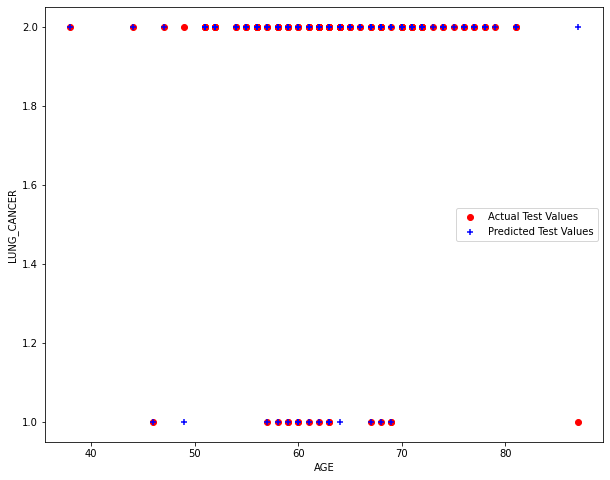

In [167]:
# Scatter Plot for Logistic Regression
data_n=x_test
data_n
ss=data_n['AGE']
plt.figure(figsize=(10, 8))
plt.xlabel('AGE')
plt.ylabel('LUNG_CANCER')
plt.scatter(ss,y_test,color='r', label='Actual Test Values')
plt.scatter(ss,lr_pred,color='b',label='Predicted Test Values', marker='+')
plt.legend()
plt.show()

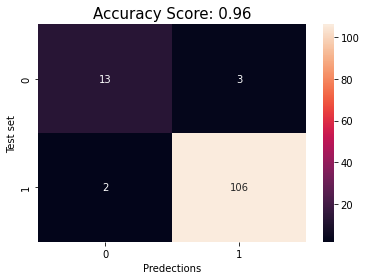

In [168]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y, lr_pred):
    acc = round(accuracy_score(y, lr_pred), 2)
    cm = confusion_matrix(y, lr_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('Predections')
    plt.ylabel('Test set')
    plt.title('Accuracy Score: {0}'.format(acc), size=15)
    plt.show()
plot_confusion_matrix(y_test, lr_pred)

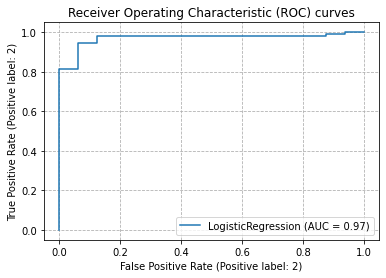

In [169]:
#Creating ROC Curve
from sklearn import metrics
metrics.plot_roc_curve(regressor, x_test, y_test)
plt.title("Receiver Operating Characteristic (ROC) curves")
plt.grid(linestyle="--")
plt.legend()
plt.show()

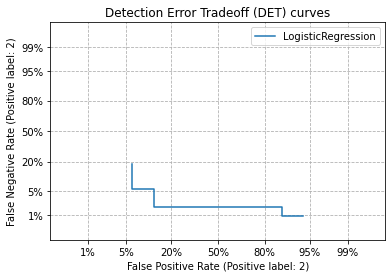

In [170]:
#Creating DET curve
metrics.plot_det_curve(regressor, x_test, y_test)
plt.title("Detection Error Tradeoff (DET) curves")
plt.grid(linestyle="--")
plt.legend()
plt.show()